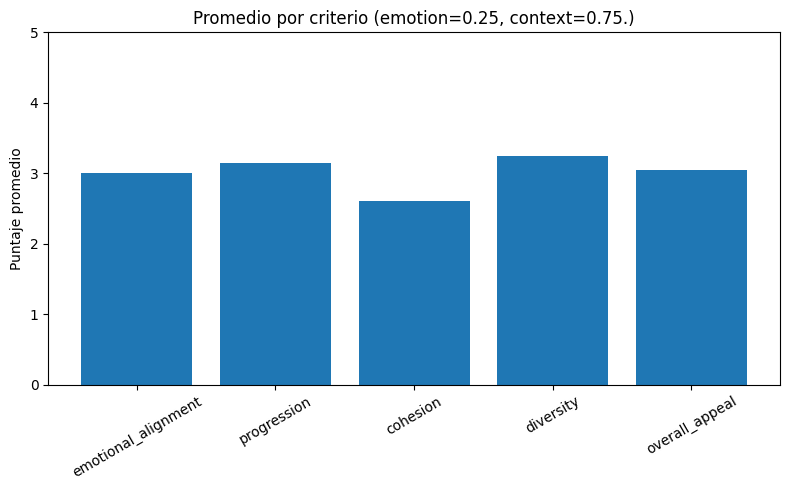

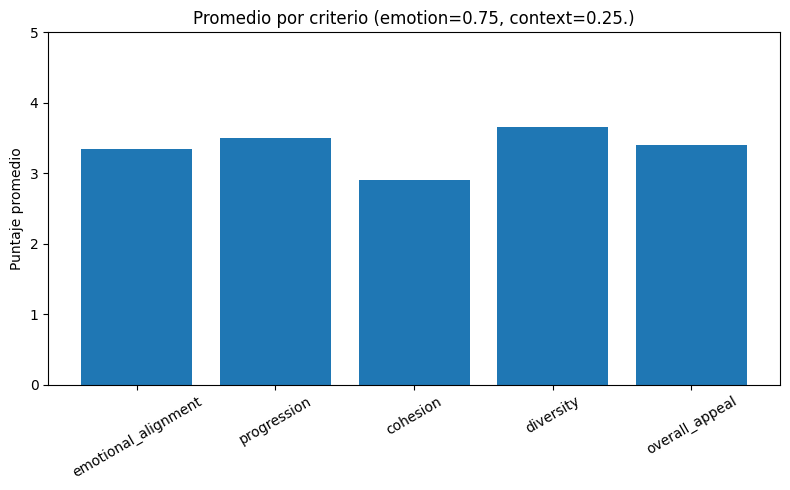

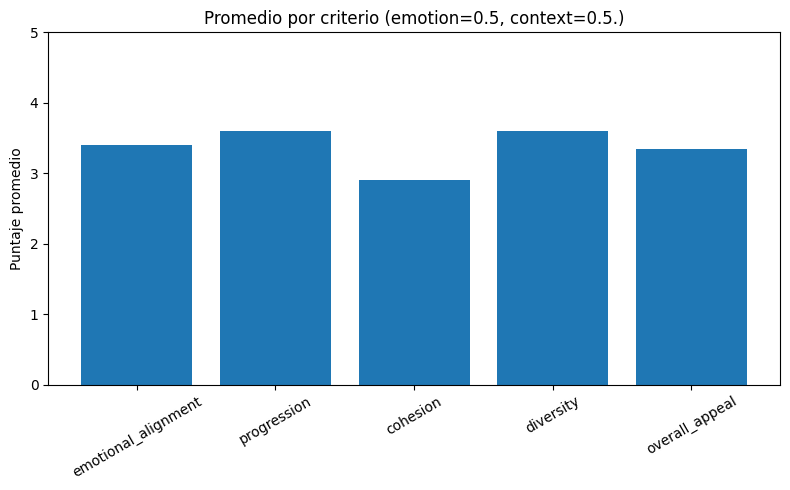

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

folder = "output_results"  # dentro de tu carpeta playlist
labels = ["emotional_alignment", "progression", "cohesion", "diversity", "overall_appeal"]

for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder, filename))
        means = df[labels].mean()
        match = re.search(r"wemo([\d.]+)_wctx([\d.]+)", filename)
        if match:
            wemo = match.group(1)
            wctx = match.group(2)
        else:
            wemo = wctx = "?"
        plt.figure(figsize=(8, 5))
        plt.bar(labels, means)
        plt.ylim(0, 5)
        plt.ylabel("Puntaje promedio")
        plt.title(f"Promedio por criterio (emotion={wemo}, context={wctx})")
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

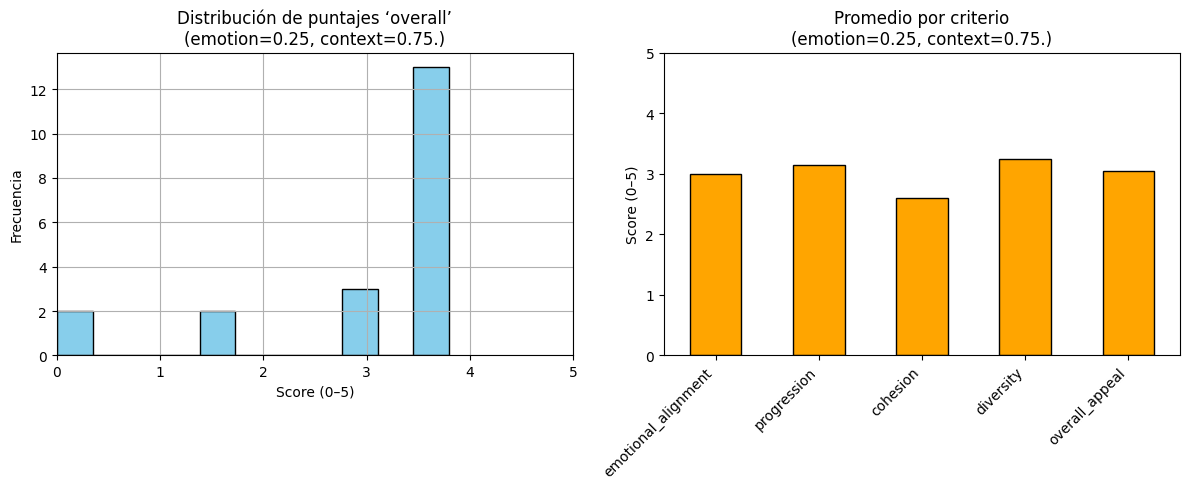

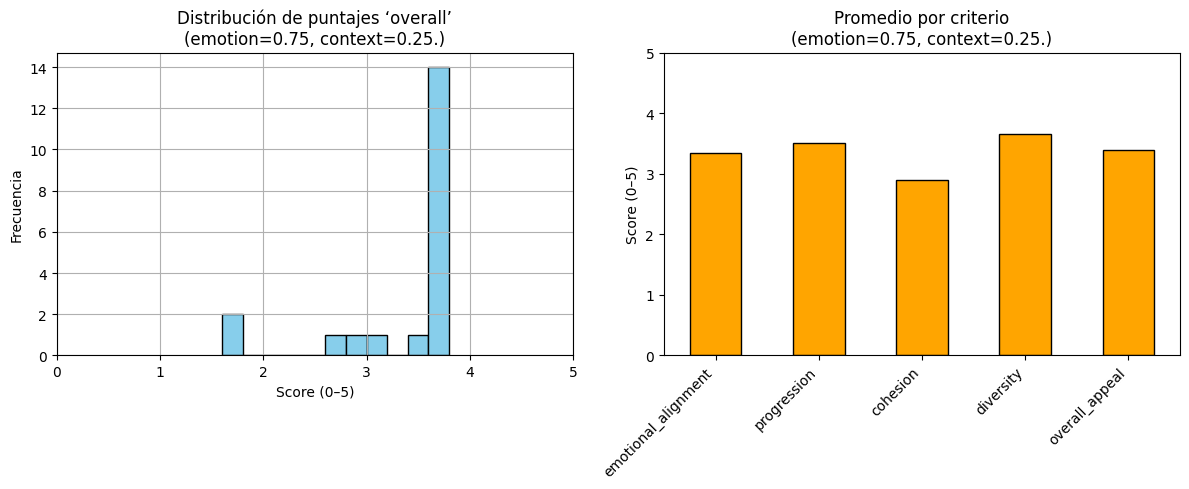

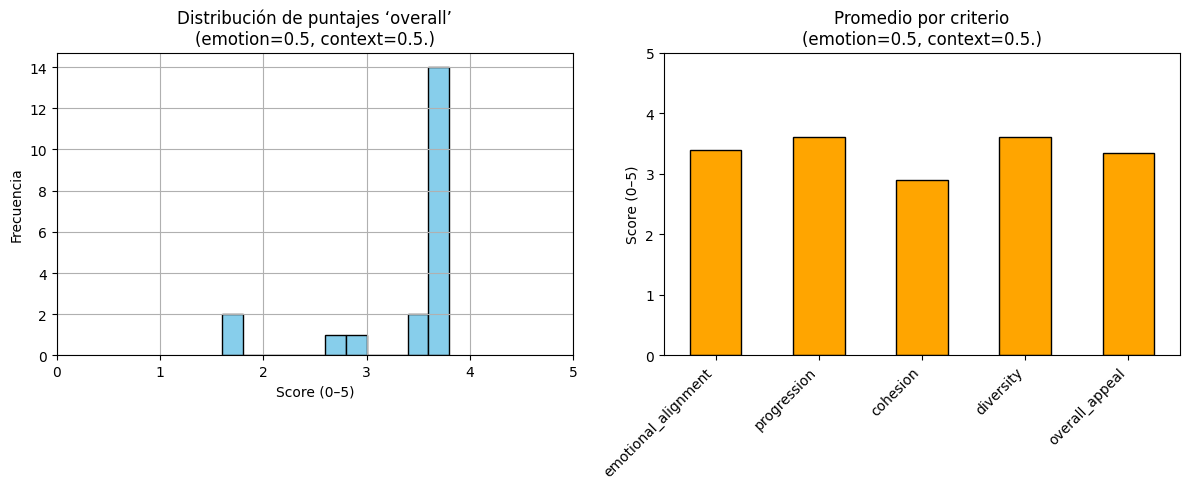

In [3]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

folder = "output_results"  # dentro de tu carpeta playlist
labels = ["emotional_alignment", "progression", "cohesion", "diversity", "overall_appeal"]

for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder, filename))
        means = df[labels].mean()

        match = re.search(r"wemo([\d.]+)_wctx([\d.]+)", filename)
        if match:
            wemo = match.group(1)
            wctx = match.group(2)
        else:
            wemo = wctx = "?"

        plt.figure(figsize=(12, 5))

        # 1. Histograma de 'overall'
        plt.subplot(1, 2, 1)
        df["overall"].hist(bins=11, color='skyblue', edgecolor='black')
        plt.title(f"Distribución de puntajes ‘overall’\n(emotion={wemo}, context={wctx})")
        plt.xlabel("Score (0–5)")
        plt.ylabel("Frecuencia")
        plt.xlim(0, 5)

        # 2. Barras de promedios por criterio
        plt.subplot(1, 2, 2)
        means.plot(kind="bar", color='orange', edgecolor='black')
        plt.ylim(0, 5)
        plt.title(f"Promedio por criterio\n(emotion={wemo}, context={wctx})")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Score (0–5)")

        plt.tight_layout()
        plt.show()
